# Let's keep this process simple , so instread of loading data from sources like in RAG, we are manually keeping corpus to answer

In [2]:
corpus_of_documents = [
    "Narendra Modi was born on 17 September 1950 in Gujarat. He began his journey in humble beginnings, famously working as a tea-seller during his youth.",
    "Modi rose through the ranks of the Bharatiya Janata Party (BJP), eventually becoming the Chief Minister of Gujarat, a position he held from 2001 to 2014.",
    "In 2014, Narendra Modi became the 15th Prime Minister of India. His leadership style and electoral campaigns brought a major shift in Indian politics.",
    "His government launched major initiatives such as Swachh Bharat (clean India), Make in India, Digital India, and Jan Dhan Yojana, targeting sanitation, manufacturing, digital growth, and financial inclusion.",
    "Modi made several bold policy decisions, including demonetisation in 2016, the rollout of the Goods and Services Tax (GST), and the abrogation of Article 370 in Jammu & Kashmir.",
    "These moves earned both praise and criticism—praised for vision and reform, criticized for disruption and execution challenges.",
    "Internationally, Modi focused on strengthening ties with global powers, promoting India's image abroad, and actively engaging with the Global South.",
    "In 2023, India successfully hosted the G20 summit under his leadership, cementing its role as a key global player.",
    "In 2024, Narendra Modi secured a historic third term as Prime Minister, now heading a coalition government under the NDA.",
    "His current focus includes expanding infrastructure, promoting social harmony, offering public health insurance, and pushing India’s transition to a net-zero carbon economy."
]


In [3]:
corpus_of_documents

['Narendra Modi was born on 17 September 1950 in Gujarat. He began his journey in humble beginnings, famously working as a tea-seller during his youth.',
 'Modi rose through the ranks of the Bharatiya Janata Party (BJP), eventually becoming the Chief Minister of Gujarat, a position he held from 2001 to 2014.',
 'In 2014, Narendra Modi became the 15th Prime Minister of India. His leadership style and electoral campaigns brought a major shift in Indian politics.',
 'His government launched major initiatives such as Swachh Bharat (clean India), Make in India, Digital India, and Jan Dhan Yojana, targeting sanitation, manufacturing, digital growth, and financial inclusion.',
 'Modi made several bold policy decisions, including demonetisation in 2016, the rollout of the Goods and Services Tax (GST), and the abrogation of Article 370 in Jammu & Kashmir.',
 'These moves earned both praise and criticism—praised for vision and reform, criticized for disruption and execution challenges.',
 "Inter

# Here the intention is just to understand how RAG works in detail. We will not be having any VectorDB or something. We will simple keep everthing here and will understand how similarity search works. (will use cosine similarity)

## In short we are doing eveything using my our own . eg. we will perform consine simliarity manually by our own 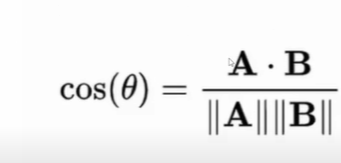

### Suppose below is the user query 

In [4]:
user_query= "I am indian and i live in india"

### Suppose below is the Documents, which are being placed in vector database

In [5]:
documents = "india is a country for indians and for everyone's else"

### Let's find the cosine similarity and in order to do that , will have to convert this into vectors. We are not using any predefined embeddinbg technique , everything we are doing is from scratch.

In [6]:
from collections import Counter
import math

In [9]:
query_tokens=user_query.lower().split(" ")  # Convert user query into Tokens

In [10]:
documents_tokens = documents.lower().split(" ")  # Convert documents into Tokens

In [11]:
query_counter = Counter(query_tokens)

In [12]:
document_counter = Counter(documents_tokens)

In [15]:
query_counter # We can use it as embeddings

Counter({'i': 2,
         'am': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [16]:
document_counter # We can use it as embeddings

Counter({'for': 2,
         'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'indians': 1,
         'and': 1,
         "everyone's": 1,
         'else': 1})

# Let's find the cosine similarity between 'user_query' and 'documents'

In [17]:
user_query_vectors=[]
for token in query_counter.keys():
    user_query_vectors.append(query_counter[token])

### Below is the Sentence Vector for 'user_query= "I am indian and i live in india"'

In [18]:
user_query_vectors

[2, 1, 1, 1, 1, 1, 1]

### We will not use sentence embeddings, rather we would be using word embeddings & will do dot product

In [23]:
for tokens in query_counter.keys() & document_counter.keys():
    print(tokens)

and
india


In [21]:
myList=[]
for tokens in query_counter.keys() & document_counter.keys():
    myList.append(query_counter[tokens]*document_counter[tokens])

In [22]:
myList

[1, 1]

In [33]:
dot_prod = sum(myList)

In [25]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

In [26]:
query_magnitude

3.1622776601683795

In [27]:
document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

In [28]:
document_magnitude

3.4641016151377544

### Let's find the similarity Search , between 'user_query' and 'documents'

In [34]:
similarity = (dot_prod)/(query_magnitude*document_magnitude)

In [35]:
similarity # 18% are match

0.18257418583505536

### We can do this similarity match for any sentences . Let's define a function for the same

In [36]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [39]:
user_query1="Is Yoga is good for health"
document1="Yoga keeps you fit and healthy and it is very good for health"

In [40]:
cosine_similarity(user_query1,document1)

0.5477225575051661

# Now let's try to implement RAG Architecture 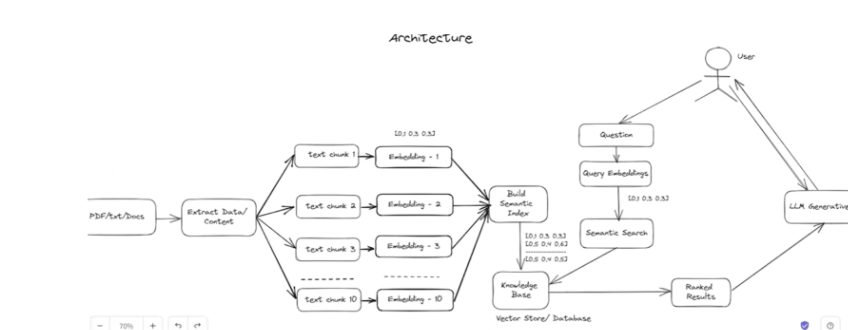 

In [41]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]

In [42]:
corpus_of_documents

['Narendra Modi was born on 17 September 1950 in Gujarat. He began his journey in humble beginnings, famously working as a tea-seller during his youth.',
 'Modi rose through the ranks of the Bharatiya Janata Party (BJP), eventually becoming the Chief Minister of Gujarat, a position he held from 2001 to 2014.',
 'In 2014, Narendra Modi became the 15th Prime Minister of India. His leadership style and electoral campaigns brought a major shift in Indian politics.',
 'His government launched major initiatives such as Swachh Bharat (clean India), Make in India, Digital India, and Jan Dhan Yojana, targeting sanitation, manufacturing, digital growth, and financial inclusion.',
 'Modi made several bold policy decisions, including demonetisation in 2016, the rollout of the Goods and Services Tax (GST), and the abrogation of Article 370 in Jammu & Kashmir.',
 'These moves earned both praise and criticism—praised for vision and reform, criticized for disruption and execution challenges.',
 "Inter

# Let's now ask anything from this

In [55]:
user_input = "where was Narendra Modi born ?"

In [60]:
relevent_document=return_response(query, corpus_of_documents)

In [57]:
query1 = "what several political decisions narendra modi has made"

In [58]:
return_response(query1, corpus_of_documents)

'Modi made several bold policy decisions, including demonetisation in 2016, the rollout of the Goods and Services Tax (GST), and the abrogation of Article 370 in Jammu & Kashmir.'

# Let's setup Ollama in our local system

### Download llama , install it on system, open cmd and run 'ollama run llama2' and ask any question, to exit type 'bye'

In [62]:
import requests
import json


In [63]:
full_response = []
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

url = 'http://localhost:11434/api/generate'


data = {
    "model": "llama2",
    "prompt": prompt.format(user_input=user_input, relevant_document=relevent_document)
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers, stream=True)


try:
    for line in response.iter_lines():
        # filter out keep-alive new lines
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            # print(decoded_line['response'])  # uncomment to results, token by token
            full_response.append(decoded_line['response'])
finally:
    response.close()
    
    
print(''.join(full_response))

Gujarat
